# Practise questions

A trading company has engaged you to perform data analysis on the product data using machine learning algorithm.

## Part 1 Classification Model

Create a classification model to predict the outcome of white wine quality based on wine white features .

The white wine dataset can be download from
https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-white.csv

The wine quality ranges from 1 to 10. Re-label the quality below 5 (1 to 5) as 0 (poor) and the quality above 5 (6 to 10) as 1 (good)

- Import the data
- Extract the features and target of the data. The target is the quality
- Scale the features
- Split and randomise the data into training and testing dataset
- Define a binary classification model
- Train the model
- Display the confusion matrix
- Compute the accuracy, precision, recall and f1 score
- Display the ROC curve and compute the AUC

Hint
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-white.csv&quot;
X = pd.read_csv(dataset_path,sep=";")

X = X.dropna()
y = X.pop('quality')

y[y<=5] = 0
y[y>5] = 1

## Part 2 Regression Model

Build a regression predictive model to predict the amount of alcohol on the same white wine dataset

- Import the data
- Extract the features and target of the data. The target is the alcohol
- Scale the features
- Split and randomise the data into training and testing dataset
- Define a linear regression model
- Train the model
- Compute the MSE and R2 of the model
- Plot the actual vs the predict alcohol level

Hint
X = X.dropna()
y = X.pop('alcohol')

## Part 3 Clustering

Perform a clustering analysis on the wholesale customer data.

- Import the data
- Extract the features and target of the data. Remove the 'Channel'
- Scale the features
- Perform Silhouette analysis
- Perform a K-Mean clustering analysis of 2 cluster on the wholesale dataset
- Plot Milk vs Frozen and color by the Channel
- Plot Milk vs Frozen and color by the clustering_labels

Hint
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/wholesale_customers_data.csv&quot;
X = pd.read_csv(dataset_path)

X = X.dropna()
y = X.pop('Channel')

## Part 4 Dimensional Reduction

- Perform a PCA with two components follow by Hierarchical Clustering on the above wholesale customer data
- Compute the explained_variance_ratio
- Plot component 1 vs component 2 and color by the cluster_labels

# Part 1 Classification Model

[[243 182]
 [125 675]]
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       425
           1       0.79      0.84      0.81       800

    accuracy                           0.75      1225
   macro avg       0.72      0.71      0.71      1225
weighted avg       0.74      0.75      0.74      1225

AUC = 0.7934647058823528


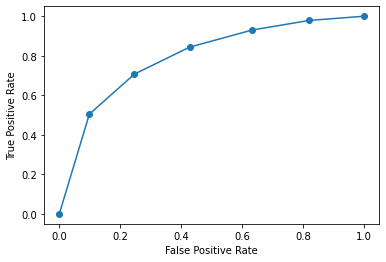

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score



# import and read dataset
dataset = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-white.csv'
x = pd.read_csv(dataset, sep=';')
x['quality'] = x['quality'].map(lambda x: 0 if x <= 5 else 1)


# Encode the labels
le = LabelEncoder()
y = le.fit_transform(x.pop('quality'))

# Normalise / scale the features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Split and randomize data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state=33 )

# Define the model
clf = KNeighborsClassifier()

# Train the model
clf.fit(X_train, y_train)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

# classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


# display ROC and AUC curve
y_probs = clf.predict_proba(X_test)
y_probs = y_probs[:,1]

auc_score = roc_auc_score(y_test, y_probs)

print(f'AUC = {auc_score}')
fpr, tpr, threshold = roc_curve(y_test, y_probs)

import matplotlib.pyplot as plt

plt.plot(fpr,
         tpr,
         '-o'
         )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Part 2 Regression Model

Mean Squared Error, Training: 0.21224863251734818
R-square, Training: 0.860318183879338
Mean Squared Error, Testing: 0.15520638131919545
R-square, Testing: 0.8966346041606659


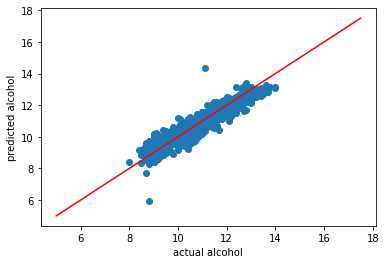

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# prepare the data
dataset = 'https://raw.githubusercontent.com/tertiarycourses/datasets/master/winequality-white.csv'
x = pd.read_csv(dataset, sep=';') # imports as a DataFrame

# extract the target, alcohol
y = x.pop('alcohol')

# normalise and scale the input data
scaler = StandardScaler()

x_scaled = pd.DataFrame(
    scaler.fit_transform(x),
    columns = x.columns
)

# split and randomize data
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size = 0.3,
    random_state = 100
)

# define model
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 

# train the model
lm.fit(X_train, y_train)

# compute MSE and R2
from sklearn.metrics import mean_squared_error, r2_score

y_hat = lm.predict(X_train)

mse = mean_squared_error(y_train, y_hat)
print(f'Mean Squared Error, Training: {mse}')

rsq = r2_score(y_train, y_hat)
print(f'R-square, Training: {rsq}')

y_hat = lm.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
print(f'Mean Squared Error, Testing: {mse}')

rsq = r2_score(y_test, y_hat)
print(f'R-square, Testing: {rsq}')

# plot the actual vs predicted

plt.scatter(y_test, y_hat)
plt.xlabel('actual alcohol')
plt.ylabel('predicted alcohol')
plt.plot([5,17.5],[5,17.5],'r')



# Part 3 Clustering



Cluster:  2 Silhouette Score: 0.5115333886055933
Cluster:  3 Silhouette Score: 0.47640890896206367
Cluster:  4 Silhouette Score: 0.3866313676375216
Cluster:  5 Silhouette Score: 0.37871584570479966
Cluster:  6 Silhouette Score: 0.37824418906721047
Cluster:  7 Silhouette Score: 0.33130005630169185
Cluster:  8 Silhouette Score: 0.3350036868032084


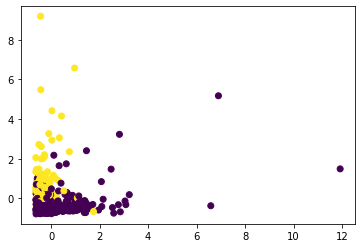

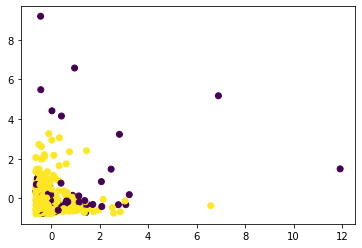

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/wholesale_customers_data.csv"

X = pd.read_csv(dataset_path).dropna()
y = X.pop('Channel')

# scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns = X.columns
)

# perform silhouette analysis
for i in range(2,9):
  cluster = KMeans(n_clusters=i, random_state =10)
  cluster.fit(X) # X is for the Iris data set
  s = silhouette_score(X, cluster.labels_)
  print('Cluster: ', i, 'Silhouette Score:', s)


# perform K means clustering with 2 clusters
cluster = KMeans(n_clusters = 2)

cluster.fit(X) # training the model

# plot milk vs frozen by channel
plt.scatter(X_scaled['Frozen'],
            X_scaled['Milk'],
            c = y)
plt.show()

# plot milk vs frozen by cluster labels
plt.scatter(X_scaled['Frozen'],
            X_scaled['Milk'],
            c = cluster.labels_)

plt.show()



# Part 4 Dimensional Reduction

Cluster: 2, Silhouette Score: 0.673215322646299
Cluster: 3, Silhouette Score: 0.6532689548766267
Cluster: 4, Silhouette Score: 0.3567245746713204
Cluster: 5, Silhouette Score: 0.39467910617024654
Cluster: 6, Silhouette Score: 0.40288184318591463
Cluster: 7, Silhouette Score: 0.40346869241197797
Cluster: 8, Silhouette Score: 0.3454722290921536
Cluster: 9, Silhouette Score: 0.3492426856337364


array([0.37795265, 0.24356898])

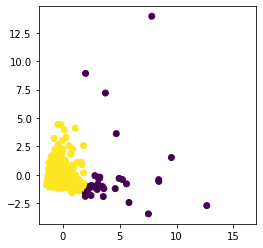

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


# import dataset
dataset_path = "https://raw.githubusercontent.com/tertiarycourses/datasets/master/wholesale_customers_data.csv"
X = pd.read_csv(dataset_path).dropna()
y = X.pop('Channel')

# perform PCA with 2 components using scaled data
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X_scaled)

# carry out hierarchical clustering
scores = {}
for i in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters=i)
  cluster.fit(X_new)
  s = silhouette_score(X_new, cluster.labels_)
  print(f'Cluster: {i}, Silhouette Score: {s}')
  scores[i] = s

# clustering with n_clusters = 2 as it is the best
cluster = AgglomerativeClustering(n_clusters=2) #cut into 3 groups
cluster.fit(X_new)

# computer the explained_variance_ratio
display(pca.explained_variance_ratio_)

# Plot component 1 vs component 2 and color by the cluster_labels
plt.scatter(X_new[:, 0], X_new[:, 1], c=cluster.labels_)
plt.axis('square')
plt.show()

